In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# display settings

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 500)

In [3]:
df = pd.read_excel("new_output.xlsx",sheet_name="Sheet1")

In [4]:
df.head(15)

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen
0,33459,145000,Tofaş,Doğan,S,1998,LPG & Benzin,Düz,83,1581,99999999,Belirtilmemiş,NaN,NaN
1,32400,160000,Tofaş,Doğan,SLX,1994,LPG & Benzin,Düz,83,1581,90000000,"1 değişen, 12 boyalı",12.000,1.000
2,33809,78500,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,55555555,Belirtilmemiş,NaN,NaN
3,31762,128000,Tofaş,Şahin,S,1998,LPG & Benzin,Düz,80,1581,11111111,Belirtilmemiş,NaN,NaN
4,33670,140000,Tofaş,Doğan,SLX ie,1999,LPG & Benzin,Düz,96,1581,9999999,Belirtilmemiş,NaN,NaN
5,32333,117777,Tofaş,Doğan,SLX,1993,LPG & Benzin,Düz,83,1581,8588888,Belirtilmemiş,NaN,NaN
6,20846,167500,Nissan,Primera,1.6 GX,1998,LPG & Benzin,Düz,100,1597,3600018,10 boyalı,10.000,0.000
7,12538,228000,Honda,Accord,1.8,1999,LPG & Benzin,Otomatik,201,2501,3595000,Belirtilmemiş,NaN,NaN
8,26681,139500,Renault,R 9,1.4 Broadway GTE,1993,LPG & Benzin,Düz,83,1390,3050000,Belirtilmemiş,NaN,NaN
9,22451,240000,Opel,Vectra,2.0 CD,1999,LPG & Benzin,Düz,136,1998,3001000,Belirtilmemiş,NaN,NaN


In [5]:
def check_df(dataframe, head=5):
    print("INFO".center(70,'='))
    print(dataframe.info())

    print("SHAPE".center(70,'='))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))

    print("TYPES".center(70,'='))
    print(dataframe.dtypes)

    print("HEAD".center(70, '='))
    print(dataframe.head(head))

    print("TAIL".center(70,'='))
    print(dataframe.tail(head))

    print("NULL".center(70,'='))
    print(dataframe.isnull().sum())

    print("QUANTILES".center(70,'='))
    print(dataframe.describe([0.05,0.25, 0.75,0.90,0.99]).T)

In [6]:
check_df(df)

=================================INFO=================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37807 entries, 0 to 37806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    37807 non-null  int64  
 1   Fiyat         37807 non-null  int64  
 2   Marka         37807 non-null  object 
 3   Seri          37807 non-null  object 
 4   Model         37807 non-null  object 
 5   Yıl           37807 non-null  int64  
 6   Yakıt Tipi    37807 non-null  object 
 7   Vites Tipi    37807 non-null  object 
 8   Motor Gücü    37807 non-null  int64  
 9   Motor Hacmi   37807 non-null  int64  
 10  Kilometre     37807 non-null  int64  
 11  Boya-değişen  37807 non-null  object 
 12  Boya          23511 non-null  float64
 13  Değişen       23511 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 4.0+ MB
None
================================SHAPE============================

In [7]:
df[(df["Kilometre"] == 0) & (df["Yıl"] < 2021)]

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen


In [8]:
df.drop(df[(df["Kilometre"] == 0) & (df["Yıl"] < 2021)].index, axis=0, inplace=True)

In [9]:
df.shape

(37807, 14)

In [10]:
df[(df["Kilometre"] == 0) & (df["Yıl"] < 2021)]

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen


In [11]:
df.drop(df[(df["Motor Gücü"] == 0) | (df["Motor Hacmi"] == 0)].index, axis=0, inplace=True)

In [12]:
df.shape

(37807, 14)

In [13]:
df[(df["Motor Gücü"] == 0) | (df["Motor Hacmi"] == 0)]

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen


In [14]:
df.loc[df["Boya-değişen"] == "Tamamı boyalı","Boya"] = "12"

In [15]:
df.loc[df["Boya-değişen"] == "Tamamı değişmiş","Değişen"] = "12"

In [16]:
df.loc[df["Boya-değişen"] == "Tamamı değişmiş","Boya"] = "0"

In [17]:
df.loc[df["Boya-değişen"] == "Tamamı orjinal","Değişen"] ="0"

In [18]:
df.loc[df["Boya-değişen"] == "Tamamı orjinal","Boya"] ="0"

In [19]:
df.loc[df["Boya-değişen"] == "Tamamı boyalı","Değişen"] ="0"

In [20]:
df[df["Boya-değişen"] == "Tamamı değişmiş"]

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen
12373,28319,120000,Renault,R 9,1.4 Broadway GTE,1991,LPG & Benzin,Düz,83,1390,225000,Tamamı değişmiş,0,12


In [21]:
#df.to_excel("new_output.xlsx")

In [22]:
df['Boya'] = pd.to_numeric(df['Boya'], errors='coerce').astype('Int64')

In [23]:
df['Değişen'] = pd.to_numeric(df['Değişen'], errors='coerce').astype('Int64')

In [24]:
check_df(df)

=================================INFO=================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37807 entries, 0 to 37806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37807 non-null  int64 
 1   Fiyat         37807 non-null  int64 
 2   Marka         37807 non-null  object
 3   Seri          37807 non-null  object
 4   Model         37807 non-null  object
 5   Yıl           37807 non-null  int64 
 6   Yakıt Tipi    37807 non-null  object
 7   Vites Tipi    37807 non-null  object
 8   Motor Gücü    37807 non-null  int64 
 9   Motor Hacmi   37807 non-null  int64 
 10  Kilometre     37807 non-null  int64 
 11  Boya-değişen  37807 non-null  object
 12  Boya          23511 non-null  Int64 
 13  Değişen       23511 non-null  Int64 
dtypes: Int64(2), int64(6), object(6)
memory usage: 4.1+ MB
None
================================SHAPE=================================
Rows: 37807


In [25]:
df["Değişen"].unique()

<IntegerArray>
[<NA>, 1, 0, 2, 4, 3, 5, 11, 6, 7, 8, 12]
Length: 12, dtype: Int64

In [26]:
df.head(15)

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya-değişen,Boya,Değişen
0,33459,145000,Tofaş,Doğan,S,1998,LPG & Benzin,Düz,83,1581,99999999,Belirtilmemiş,<NA>,<NA>
1,32400,160000,Tofaş,Doğan,SLX,1994,LPG & Benzin,Düz,83,1581,90000000,"1 değişen, 12 boyalı",12,1
2,33809,78500,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,55555555,Belirtilmemiş,<NA>,<NA>
3,31762,128000,Tofaş,Şahin,S,1998,LPG & Benzin,Düz,80,1581,11111111,Belirtilmemiş,<NA>,<NA>
4,33670,140000,Tofaş,Doğan,SLX ie,1999,LPG & Benzin,Düz,96,1581,9999999,Belirtilmemiş,<NA>,<NA>
5,32333,117777,Tofaş,Doğan,SLX,1993,LPG & Benzin,Düz,83,1581,8588888,Belirtilmemiş,<NA>,<NA>
6,20846,167500,Nissan,Primera,1.6 GX,1998,LPG & Benzin,Düz,100,1597,3600018,10 boyalı,10,0
7,12538,228000,Honda,Accord,1.8,1999,LPG & Benzin,Otomatik,201,2501,3595000,Belirtilmemiş,<NA>,<NA>
8,26681,139500,Renault,R 9,1.4 Broadway GTE,1993,LPG & Benzin,Düz,83,1390,3050000,Belirtilmemiş,<NA>,<NA>
9,22451,240000,Opel,Vectra,2.0 CD,1999,LPG & Benzin,Düz,136,1998,3001000,Belirtilmemiş,<NA>,<NA>


In [27]:
df.isnull().sum()

Unnamed: 0          0
Fiyat               0
Marka               0
Seri                0
Model               0
Yıl                 0
Yakıt Tipi          0
Vites Tipi          0
Motor Gücü          0
Motor Hacmi         0
Kilometre           0
Boya-değişen        0
Boya            14296
Değişen         14296
dtype: int64

In [28]:
df.drop("Boya-değişen", axis=1, inplace=True)

In [29]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
df

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
0,145000,Tofaş,Doğan,S,1998,LPG & Benzin,Düz,83,1581,99999999,<NA>,<NA>
1,160000,Tofaş,Doğan,SLX,1994,LPG & Benzin,Düz,83,1581,90000000,12,1
2,78500,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,55555555,<NA>,<NA>
3,128000,Tofaş,Şahin,S,1998,LPG & Benzin,Düz,80,1581,11111111,<NA>,<NA>
4,140000,Tofaş,Doğan,SLX ie,1999,LPG & Benzin,Düz,96,1581,9999999,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
37802,3590000,Mercedes - Benz,E,200 d Exclusive,2022,Dizel,Otomatik,160,1597,0,<NA>,<NA>
37803,949000,Opel,Astra,1.2 Turbo Edition,2023,Benzin,Düz,132,1199,0,0,0
37804,16950000,Porsche,911,Carrera 4S,2023,Benzin,Otomatik,450,2981,0,<NA>,<NA>
37805,239000,Porsche,911,Turbo S,2023,Benzin,Otomatik,580,3800,0,<NA>,<NA>


In [31]:
df["Marka"].value_counts().sort_values(ascending=True)

McLaren               1
Buick                 1
Cadillac              1
Dodge                 2
Ikco                  2
MG                    2
Infiniti              2
Plymouth              2
Lamborghini           5
Rolls-Royce           6
Bentley               8
Smart                 9
Maserati              9
Aston Martin          9
Saab                  9
Ferrari              13
Lancia               14
Chery                22
Daihatsu             23
DS Automobiles       30
Daewoo               31
Chrysler             32
Subaru               40
Jaguar               40
Proton               49
Geely                49
Rover                57
Porsche              68
Tata                 80
MINI                101
Suzuki              116
Alfa Romeo          124
Mitsubishi          164
Lada                213
Mazda               242
Nissan              408
Volvo               431
Kia                 600
Dacia               845
Chevrolet           883
Seat               1218
Skoda           

In [32]:
df = df[df["Marka"].isin(df["Marka"].value_counts()[df["Marka"].value_counts() >= 100].index)]

In [33]:
df["Marka"].value_counts().sort_values(ascending=True)

MINI                101
Suzuki              116
Alfa Romeo          124
Mitsubishi          164
Lada                213
Mazda               242
Nissan              408
Volvo               431
Kia                 600
Dacia               845
Chevrolet           883
Seat               1218
Skoda              1390
Audi               1550
Citroen            1567
Tofaş              1796
Mercedes - Benz    2111
Honda              2177
BMW                2272
Toyota             2278
Fiat               2363
Renault            2364
Hyundai            2379
Volkswagen         2382
Peugeot            2387
Opel               2405
Ford               2425
Name: Marka, dtype: int64

In [34]:
df

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
0,145000,Tofaş,Doğan,S,1998,LPG & Benzin,Düz,83,1581,99999999,<NA>,<NA>
1,160000,Tofaş,Doğan,SLX,1994,LPG & Benzin,Düz,83,1581,90000000,12,1
2,78500,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,55555555,<NA>,<NA>
3,128000,Tofaş,Şahin,S,1998,LPG & Benzin,Düz,80,1581,11111111,<NA>,<NA>
4,140000,Tofaş,Doğan,SLX ie,1999,LPG & Benzin,Düz,96,1581,9999999,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
37800,13950000,Mercedes - Benz,S,S 400 400d Long Inspiration,2023,Dizel,Otomatik,330,2925,0,<NA>,<NA>
37801,10995000,Mercedes - Benz,S,S 400 400 d AMG,2021,Dizel,Otomatik,340,2925,0,<NA>,<NA>
37802,3590000,Mercedes - Benz,E,200 d Exclusive,2022,Dizel,Otomatik,160,1597,0,<NA>,<NA>
37803,949000,Opel,Astra,1.2 Turbo Edition,2023,Benzin,Düz,132,1199,0,0,0


In [35]:
df.isnull().sum()

Fiyat              0
Marka              0
Seri               0
Model              0
Yıl                0
Yakıt Tipi         0
Vites Tipi         0
Motor Gücü         0
Motor Hacmi        0
Kilometre          0
Boya           13986
Değişen        13986
dtype: int64

In [36]:
df.skew()

C:\Users\senab\AppData\Local\Temp\ipykernel_6740\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Fiyat          93.471
Yıl            -0.775
Motor Gücü      4.845
Motor Hacmi     4.281
Kilometre     113.267
Boya            1.298
Değişen         1.779
dtype: float64

In [37]:
df[df["Kilometre"] > 999999]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
0,145000,Tofaş,Doğan,S,1998,LPG & Benzin,Düz,83,1581,99999999,<NA>,<NA>
1,160000,Tofaş,Doğan,SLX,1994,LPG & Benzin,Düz,83,1581,90000000,12,1
2,78500,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,55555555,<NA>,<NA>
3,128000,Tofaş,Şahin,S,1998,LPG & Benzin,Düz,80,1581,11111111,<NA>,<NA>
4,140000,Tofaş,Doğan,SLX ie,1999,LPG & Benzin,Düz,96,1581,9999999,<NA>,<NA>
5,117777,Tofaş,Doğan,SLX,1993,LPG & Benzin,Düz,83,1581,8588888,<NA>,<NA>
6,167500,Nissan,Primera,1.6 GX,1998,LPG & Benzin,Düz,100,1597,3600018,10,0
7,228000,Honda,Accord,1.8,1999,LPG & Benzin,Otomatik,201,2501,3595000,<NA>,<NA>
8,139500,Renault,R 9,1.4 Broadway GTE,1993,LPG & Benzin,Düz,83,1390,3050000,<NA>,<NA>
9,240000,Opel,Vectra,2.0 CD,1999,LPG & Benzin,Düz,136,1998,3001000,<NA>,<NA>


In [38]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,37191.000,559175.680,1097845.511,1425.000,130000.000,275000.000,423000.000,645000.000,960000.000,2570500.000,165000000.000
Yıl,37191.000,2009.049,7.994,1955.000,1993.000,2004.000,2011.000,2015.000,2018.000,2022.000,2023.000
Motor Gücü,37191.000,110.084,39.312,39.000,70.000,88.000,102.000,124.000,152.000,245.000,1599.000
Motor Hacmi,37191.000,1545.462,306.255,133.000,1200.000,1390.000,1560.000,1598.000,1896.000,2967.000,6208.000
Kilometre,37191.000,193400.755,765735.126,0.000,33836.500,114500.000,180000.000,248000.000,307000.000,455000.000,99999999.000
Boya,23205.000,2.856,3.388,0.000,0.000,0.000,2.000,4.000,8.000,12.000,12.000
Değişen,23205.000,0.673,1.016,0.000,0.000,0.000,0.000,1.000,2.000,4.000,12.000


In [39]:
df[(df["Fiyat"] < 50000) & (df["Yıl"] > 2009)]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
14767,1425,Audi,A6,A6 Sedan 2.0 TDI,2015,Dizel,Yarı Otomatik,190,1968,207000,2,3
16003,10000,Volkswagen,Passat,2.0 TDi Comfortline,2010,Dizel,Düz,140,1968,200000,<NA>,<NA>
28018,11111,Hyundai,i20,1.4 CRDi Jump,2017,Dizel,Düz,90,1396,117000,<NA>,<NA>
34824,45000,BMW,3 Serisi,316i Standart,2010,Benzin,Düz,122,1597,50000,0,0


In [40]:
df.drop(df[(df["Fiyat"] < 50000) & (df["Yıl"] > 2009)].index, axis=0, inplace=True)

C:\Users\senab\AppData\Local\Temp\ipykernel_6740\112327911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df["Fiyat"] < 50000) & (df["Yıl"] > 2009)].index, axis=0, inplace=True)


In [41]:
df.groupby("Marka").agg({"Fiyat":["mean","min","max"]})

Fiyat                   
                       mean     min        max
Marka                                         
Alfa Romeo       392721.024  120000     885000
Audi            1078631.014   51999   13650000
BMW             1051726.933  110000   12950000
Chevrolet        373877.164  154000    9000000
Citroen          389331.139   65000    4350000
Dacia            409648.450   99500     824000
Fiat             360931.313   79000     925000
Ford             444901.051   42500    2450000
Honda            603832.316  110000    2400000
Hyundai          396205.636   82500    1110000
Kia              447851.958   82000     955000
Lada             113087.319   55000     242000
MINI             688964.347  290000    2825000
Mazda            348511.475   67000    1420000
Mercedes - Benz 1504736.983   48000  165000000
Mitsubishi       302895.018   65000    2000000
Nissan           354028.282  105000    2750000
Opel             415155.777   70000    1400000
Peugeot          364022.790   66750    1600000
Renault          402852.261   33000    1210000
Seat             510786.049   74000    1650000
Skoda            572797.363   59000    2065000
Suzuki           270629.733   66500     799000
Tofaş            130569.421   17500    1111111
Toyota           482081.686   86000    1200000
Volkswagen       623888.446  125500   10000000
Volvo            715716.046  149000    4195000

In [42]:
df[df["Marka"]=="Renault"].sort_values("Fiyat",ascending=True)

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
34,33000,Renault,R 12,TSW,1990,LPG & Benzin,Düz,72,1397,998545,<NA>,<NA>
1772,61750,Renault,R 12,SW,1979,LPG & Benzin,Düz,60,1300,352652,<NA>,<NA>
17501,65000,Renault,R 12,TS,1982,LPG & Benzin,Düz,54,1300,190000,2,0
37103,65000,Renault,R 12,TL,1976,LPG & Benzin,Düz,54,1300,10000,<NA>,<NA>
77,67000,Renault,R 12,TS,1980,LPG & Benzin,Düz,54,1300,664646,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
36189,1068000,Renault,Megane,1.5 Blue DCI Icon,2020,Dizel,Yarı Otomatik,115,1461,28500,0,0
35808,1100000,Renault,Megane,1.5 dCi Icon,2016,Dizel,Yarı Otomatik,110,1461,35000,0,0
28047,1179000,Renault,Talisman,1.6 dCi Icon,2016,Dizel,Yarı Otomatik,130,1598,117000,1,0
30295,1195000,Renault,R 12,TSW,1972,Benzin,Düz,72,1397,98877,<NA>,<NA>


In [43]:
df[(df["Fiyat"] > 1000000) & (df["Yıl"] < 2000)]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
9225,1111111,Tofaş,Doğan,L,1992,LPG & Benzin,Düz,83,1581,250000,<NA>,<NA>
16002,10000000,Volkswagen,Polo,1.6,1999,LPG & Benzin,Düz,75,1598,200000,<NA>,<NA>
17717,2850000,Mercedes - Benz,SL,350,1974,Benzin,Otomatik,225,4497,188647,10,0
18510,1100000,Mercedes - Benz,S,S 320 320,1998,Benzin,Otomatik,231,3199,183000,<NA>,<NA>
18706,1875000,Mercedes - Benz,SL,320,1994,Benzin,Otomatik,231,3199,181649,9,0
21933,2000000,BMW,3 Serisi,318i Standart,1988,Benzin,Düz,126,1801,160000,<NA>,<NA>
26065,1350000,BMW,7 Serisi,750i Long,1998,Benzin,Otomatik,326,5379,131750,<NA>,<NA>
30295,1195000,Renault,R 12,TSW,1972,Benzin,Düz,72,1397,98877,<NA>,<NA>
30550,2850000,Volvo,S70,2.0 T5,1998,Benzin,Otomatik,226,1801,96585,0,0
31120,5950000,Chevrolet,Corvette,C6,1960,Benzin,Otomatik,275,5733,91816,<NA>,<NA>


In [44]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,37187.000,559234.011,1097890.134,17500.000,130000.000,275000.000,423000.000,645000.000,960000.000,2570700.000,165000000.000
Yıl,37187.000,2009.049,7.994,1955.000,1993.000,2004.000,2011.000,2015.000,2018.000,2022.000,2023.000
Motor Gücü,37187.000,110.081,39.311,39.000,70.000,88.000,102.000,124.000,152.000,245.000,1599.000
Motor Hacmi,37187.000,1545.442,306.254,133.000,1200.000,1390.000,1560.000,1598.000,1896.000,2967.000,6208.000
Kilometre,37187.000,193406.122,765775.841,0.000,33813.900,114500.000,180000.000,248000.000,307000.000,455000.000,99999999.000
Boya,23203.000,2.856,3.388,0.000,0.000,0.000,2.000,4.000,8.000,12.000,12.000
Değişen,23203.000,0.673,1.016,0.000,0.000,0.000,0.000,1.000,2.000,4.000,12.000


In [45]:
df[(df["Fiyat"] > 100000000) ]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
37298,165000000,Mercedes - Benz,Maybach S,S 650,2022,Benzin,Otomatik,630,5980,6666,0,0


In [46]:
df[(df["Marka"]=="Mercedes - Benz")].sort_values("Fiyat",ascending=True)

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
218,48000,Mercedes - Benz,230,E,1983,LPG & Benzin,Otomatik,136,2299,500000,0,0
663,67500,Mercedes - Benz,300,TD,1979,Dizel,Düz,101,1801,415000,<NA>,<NA>
73,95000,Mercedes - Benz,300,D,1980,Dizel,Düz,151,3001,677000,<NA>,<NA>
37734,95000,Mercedes - Benz,200,D,1984,Dizel,Düz,75,1997,1000,<NA>,<NA>
1704,105000,Mercedes - Benz,E,200 d E 200 d,1981,Dizel,Düz,60,1988,355555,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
37501,19400000,Mercedes - Benz,SL,63 AMG,2022,Benzin,Otomatik,585,3982,6001,0,0
36581,20500000,Mercedes - Benz,SLS,AMG,2011,Benzin,Otomatik,571,6208,20926,0,0
37299,23700000,Mercedes - Benz,Maybach S,S 680,2022,Benzin,Otomatik,612,5980,6666,0,0
36632,23850000,Mercedes - Benz,Maybach S,S 680,2021,Benzin,Otomatik,612,5980,20000,<NA>,<NA>


In [47]:
df.drop(df[(df["Marka"]=="Mercedes - Benz") & (df["Fiyat"] > 50000000)].index, axis=0, inplace=True)

C:\Users\senab\AppData\Local\Temp\ipykernel_6740\4135948977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df["Marka"]=="Mercedes - Benz") & (df["Fiyat"] > 50000000)].index, axis=0, inplace=True)


In [48]:
df[(df["Marka"]=="Mercedes - Benz") & (df["Fiyat"] < 50000000)].describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,2110.000,1427251.076,2066685.345,48000.000,213450.000,525000.000,1000000.000,1500000.000,2301500.000,11972750.000,23850000.000
Yıl,2110.000,2008.600,10.366,1968.000,1987.000,2002.000,2012.000,2016.000,2020.000,2022.000,2023.000
Motor Gücü,2110.000,163.840,74.027,51.000,95.000,136.000,156.000,176.000,224.000,467.740,1599.000
Motor Hacmi,2110.000,1933.742,608.673,204.000,1461.000,1595.000,1796.000,1998.000,2925.000,4648.060,6208.000
Kilometre,2110.000,204431.172,133352.911,0.000,17225.000,100125.000,182000.000,295000.000,398550.000,546820.000,736000.000
Boya,1202.000,2.300,3.573,0.000,0.000,0.000,0.000,3.000,9.000,12.000,12.000
Değişen,1202.000,0.435,0.870,0.000,0.000,0.000,0.000,1.000,2.000,3.990,7.000


In [49]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,37186.000,554811.896,691505.665,17500.000,130000.000,275000.000,423000.000,645000.000,960000.000,2565750.000,23850000.000
Yıl,37186.000,2009.048,7.994,1955.000,1993.000,2004.000,2011.000,2015.000,2018.000,2022.000,2023.000
Motor Gücü,37186.000,110.067,39.219,39.000,70.000,88.000,102.000,124.000,152.000,245.000,1599.000
Motor Hacmi,37186.000,1545.323,305.394,133.000,1200.000,1390.000,1560.000,1598.000,1895.500,2967.000,6208.000
Kilometre,37186.000,193411.144,765785.526,0.000,33919.750,114500.000,180000.000,248000.000,307000.000,455000.000,99999999.000
Boya,23202.000,2.856,3.388,0.000,0.000,0.000,2.000,4.000,8.000,12.000,12.000
Değişen,23202.000,0.673,1.016,0.000,0.000,0.000,0.000,1.000,2.000,4.000,12.000


In [50]:
df[(df["Kilometre"] > 3000000) & (df["Marka"]=="Tofaş")]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
0,145000,Tofaş,Doğan,S,1998,LPG & Benzin,Düz,83,1581,99999999,<NA>,<NA>
1,160000,Tofaş,Doğan,SLX,1994,LPG & Benzin,Düz,83,1581,90000000,12,1
2,78500,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,55555555,<NA>,<NA>
3,128000,Tofaş,Şahin,S,1998,LPG & Benzin,Düz,80,1581,11111111,<NA>,<NA>
4,140000,Tofaş,Doğan,SLX ie,1999,LPG & Benzin,Düz,96,1581,9999999,<NA>,<NA>
5,117777,Tofaş,Doğan,SLX,1993,LPG & Benzin,Düz,83,1581,8588888,<NA>,<NA>


In [51]:
df.drop(df[(df["Kilometre"] > 3000000) & (df["Marka"]=="Tofaş")].index, axis=0, inplace=True)

C:\Users\senab\AppData\Local\Temp\ipykernel_6740\2109122983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df["Kilometre"] > 3000000) & (df["Marka"]=="Tofaş")].index, axis=0, inplace=True)


In [52]:
df[df["Marka"]=="Tofaş"].describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,1790.000,130577.321,57105.166,17500.000,75000.000,100000.000,125000.000,150000.000,178050.000,255000.000,1111111.000
Yıl,1790.000,1993.953,4.461,1971.000,1988.000,1992.000,1994.000,1997.000,1999.000,2001.000,2002.000
Motor Gücü,1790.000,80.426,11.753,50.000,65.000,80.000,83.000,83.000,83.000,126.000,226.000
Motor Hacmi,1790.000,1546.345,94.086,1201.000,1239.000,1581.000,1581.000,1581.000,1581.000,1600.000,1601.000
Kilometre,1790.000,162038.736,134699.387,6.000,21112.500,86089.000,135000.000,200000.000,275100.000,910995.380,1111111.000
Boya,634.000,4.197,5.064,0.000,0.000,0.000,1.000,10.000,12.000,12.000,12.000
Değişen,634.000,0.811,1.030,0.000,0.000,0.000,0.000,1.000,2.000,4.000,5.000


In [53]:
df[(df["Kilometre"] < 1000) & (df["Yıl"] < 2000)].sort_values("Yıl",ascending=True)

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
37778,125000,Peugeot,405,1.9 GR,1990,LPG & Benzin,Düz,109,1905,150,<NA>,<NA>
37791,85000,Tofaş,Kartal,Kartal 5 Vites,1990,LPG & Benzin,Düz,83,1581,6,<NA>,<NA>
37782,85000,Tofaş,Kartal,Kartal 5 Vites,1992,LPG & Benzin,Düz,83,1581,110,<NA>,<NA>
37775,97000,Tofaş,Şahin,Şahin 5 Vites,1994,LPG & Benzin,Düz,80,1581,200,9,4
37761,236000,Toyota,Corolla,1.6 GLi Special,1998,LPG & Benzin,Otomatik,114,1587,298,<NA>,<NA>
37763,193000,Opel,Vectra,1.6 GL,1998,LPG & Benzin,Düz,100,1598,286,11,1
37770,190000,Renault,R 9,1.4 Broadway RL,1998,LPG & Benzin,Düz,83,1390,225,3,0


In [54]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,37180.000,554880.739,691540.145,17500.000,130000.000,275000.000,423000.000,645000.000,960000.000,2566050.000,23850000.000
Yıl,37180.000,2009.051,7.993,1955.000,1993.000,2004.000,2011.000,2015.000,2018.000,2022.000,2023.000
Motor Gücü,37180.000,110.071,39.221,39.000,70.000,88.000,102.000,124.000,152.000,245.000,1599.000
Motor Hacmi,37180.000,1545.317,305.418,133.000,1200.000,1390.000,1560.000,1598.000,1896.000,2967.000,6208.000
Kilometre,37180.000,186039.033,107154.205,0.000,33887.350,114500.000,180000.000,248000.000,306050.000,452210.000,3600018.000
Boya,23201.000,2.856,3.388,0.000,0.000,0.000,2.000,4.000,8.000,12.000,12.000
Değişen,23201.000,0.673,1.016,0.000,0.000,0.000,0.000,1.000,2.000,4.000,12.000


In [55]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car,num_but_cat

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37180 entries, 6 to 37806
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fiyat        37180 non-null  int64 
 1   Marka        37180 non-null  object
 2   Seri         37180 non-null  object
 3   Model        37180 non-null  object
 4   Yıl          37180 non-null  int64 
 5   Yakıt Tipi   37180 non-null  object
 6   Vites Tipi   37180 non-null  object
 7   Motor Gücü   37180 non-null  int64 
 8   Motor Hacmi  37180 non-null  int64 
 9   Kilometre    37180 non-null  int64 
 10  Boya         23201 non-null  Int64 
 11  Değişen      23201 non-null  Int64 
dtypes: Int64(2), int64(5), object(5)
memory usage: 3.8+ MB


In [57]:
df.columns

Index(['Fiyat', 'Marka', 'Seri', 'Model', 'Yıl', 'Yakıt Tipi', 'Vites Tipi', 'Motor Gücü', 'Motor Hacmi', 'Kilometre', 'Boya', 'Değişen'], dtype='object')

In [58]:
df.Model.nunique()

2766

In [59]:
cat_cols, num_cols, cat_but_car,num_but_cat = grab_col_names(df)

Observations: 37180
Variables: 12
cat_cols: 2
num_cols: 7
cat_but_car: 3
num_but_cat: 0


In [60]:
cat_cols

['Yakıt Tipi', 'Vites Tipi']

In [61]:
num_cols

['Fiyat', 'Yıl', 'Motor Gücü', 'Motor Hacmi', 'Kilometre', 'Boya', 'Değişen']

In [62]:
cat_but_car

['Marka', 'Seri', 'Model']

In [63]:
num_but_cat

[]

In [64]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100*dataframe[col_name].value_counts() / len(dataframe)}))
    
    print("===============================")
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show()

              Yakıt Tipi  Ratio
Dizel              15191 40.858
LPG & Benzin       13833 37.205
Benzin              8156 21.937


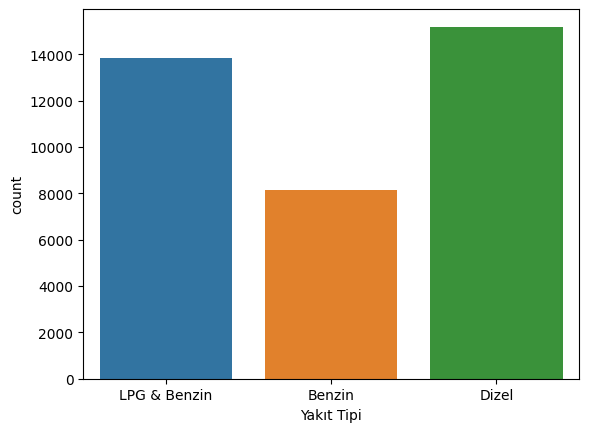

               Vites Tipi  Ratio
Düz                 22772 61.248
Otomatik             8814 23.706
Yarı Otomatik        5594 15.046


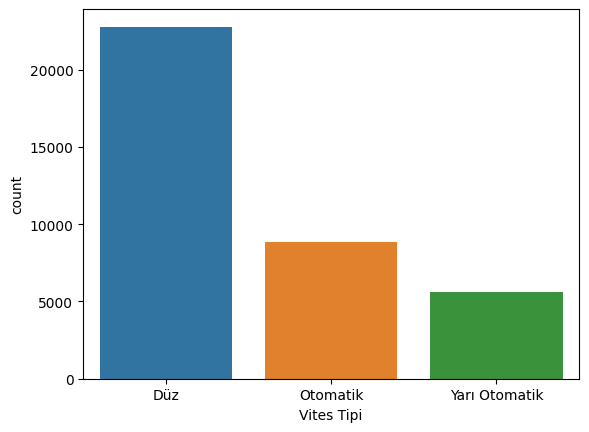

In [65]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [66]:
def num_summary(dataframe, numerical_col, target,plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        #plt.hist(dataframe[numerical_col])
        #dataframe[numerical_col].hist(bins=20)
        sns.scatterplot(data=dataframe, x=col, y=target)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count      37180.000
mean      554880.739
std       691540.145
min        17500.000
5%        130000.000
10%       175000.000
20%       245980.000
30%       302000.000
40%       360000.000
50%       423000.000
60%       493850.000
70%       589900.000
80%       715000.000
90%       960000.000
95%      1310000.000
99%      2566050.000
max     23850000.000
Name: Fiyat, dtype: float64


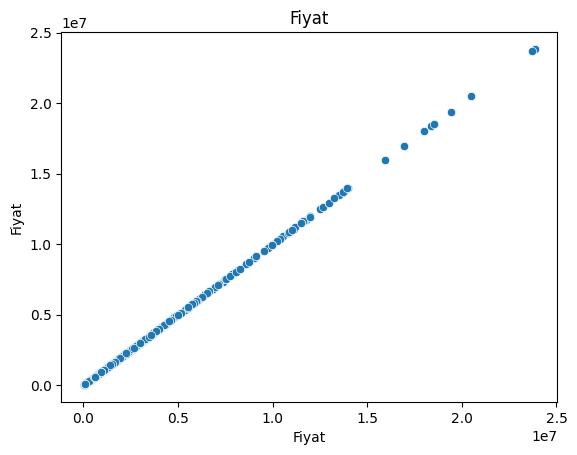

count   37180.000
mean     2009.051
std         7.993
min      1955.000
5%       1993.000
10%      1997.000
20%      2002.000
30%      2006.000
40%      2008.000
50%      2011.000
60%      2012.000
70%      2014.000
80%      2016.000
90%      2018.000
95%      2020.000
99%      2022.000
max      2023.000
Name: Yıl, dtype: float64


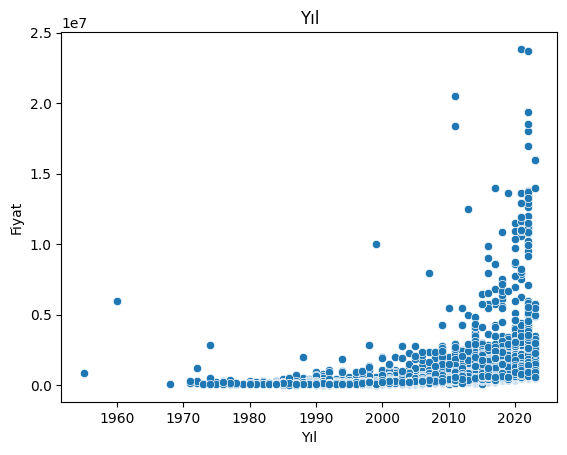

count   37180.000
mean      110.071
std        39.221
min        39.000
5%         70.000
10%        75.000
20%        83.000
30%        90.000
40%        95.000
50%       102.000
60%       110.000
70%       118.000
80%       125.000
90%       152.000
95%       177.000
99%       245.000
max      1599.000
Name: Motor Gücü, dtype: float64


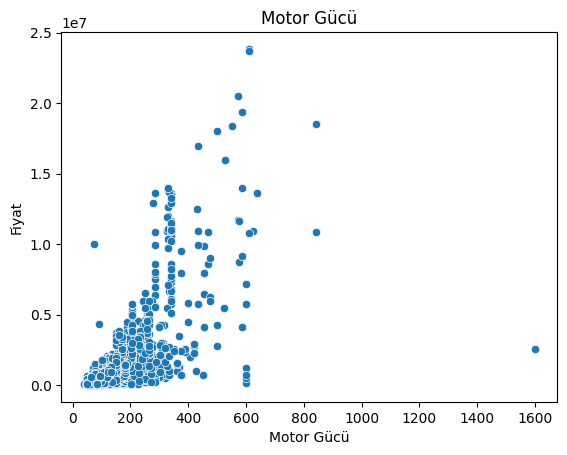

count   37180.000
mean     1545.317
std       305.418
min       133.000
5%       1200.000
10%      1248.000
20%      1368.000
30%      1398.000
40%      1493.000
50%      1560.000
60%      1587.000
70%      1597.000
80%      1598.000
90%      1896.000
95%      1995.000
99%      2967.000
max      6208.000
Name: Motor Hacmi, dtype: float64


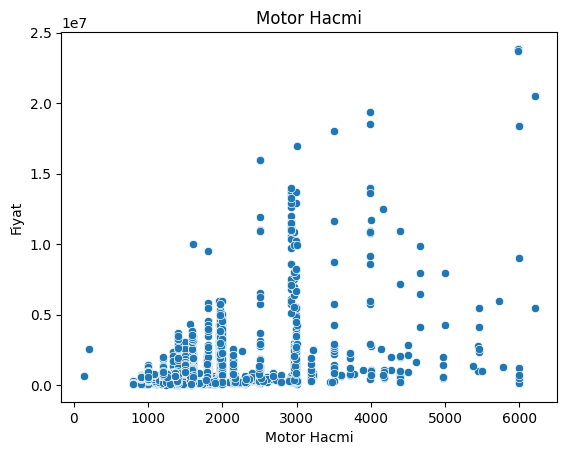

count     37180.000
mean     186039.033
std      107154.205
min           0.000
5%        33887.350
10%       62000.000
20%       99000.000
30%      129000.000
40%      155533.000
50%      180000.000
60%      205000.000
70%      232000.000
80%      263000.000
90%      306050.000
95%      350000.000
99%      452210.000
max     3600018.000
Name: Kilometre, dtype: float64


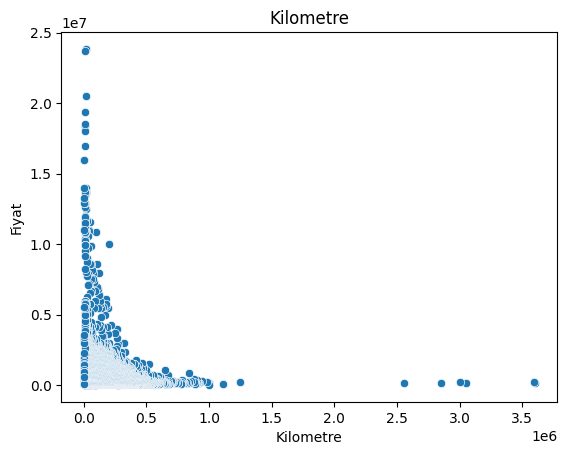

count   23201.000
mean        2.856
std         3.388
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         1.000
50%         2.000
60%         3.000
70%         4.000
80%         5.000
90%         8.000
95%        11.000
99%        12.000
max        12.000
Name: Boya, dtype: Float64


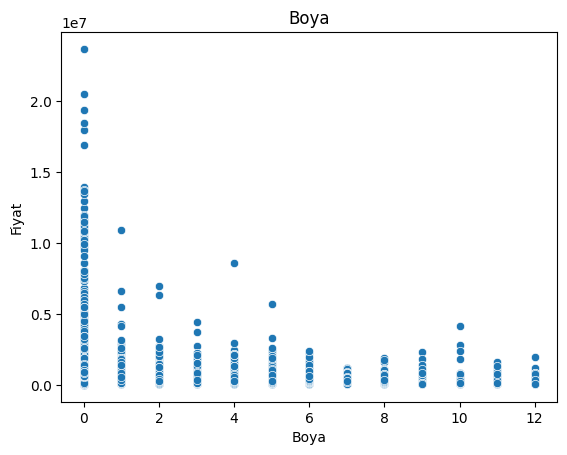

count   23201.000
mean        0.673
std         1.016
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         1.000
80%         1.000
90%         2.000
95%         3.000
99%         4.000
max        12.000
Name: Değişen, dtype: Float64


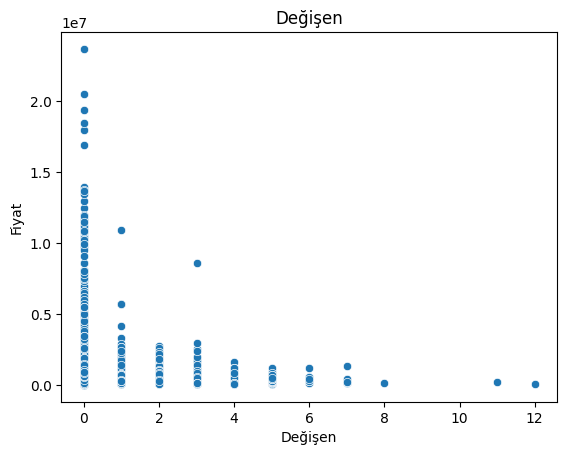

In [67]:
for col in num_cols:
    num_summary(df, col,"Fiyat", plot=True)

In [68]:
df.corr()

C:\Users\senab\AppData\Local\Temp\ipykernel_6740\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Fiyat,Yıl,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
Fiyat,1.000,0.413,0.652,0.382,-0.288,-0.226,-0.151
Yıl,0.413,1.000,0.257,-0.143,-0.482,-0.425,-0.179
Motor Gücü,0.652,0.257,1.000,0.727,-0.052,-0.111,-0.094
Motor Hacmi,0.382,-0.143,0.727,1.000,0.205,0.064,-0.011
Kilometre,-0.288,-0.482,-0.052,0.205,1.000,0.374,0.197
Boya,-0.226,-0.425,-0.111,0.064,0.374,1.000,0.151
Değişen,-0.151,-0.179,-0.094,-0.011,0.197,0.151,1.000


C:\Users\senab\AppData\Local\Temp\ipykernel_6740\324059130.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f",ax=ax,cmap="coolwarm")


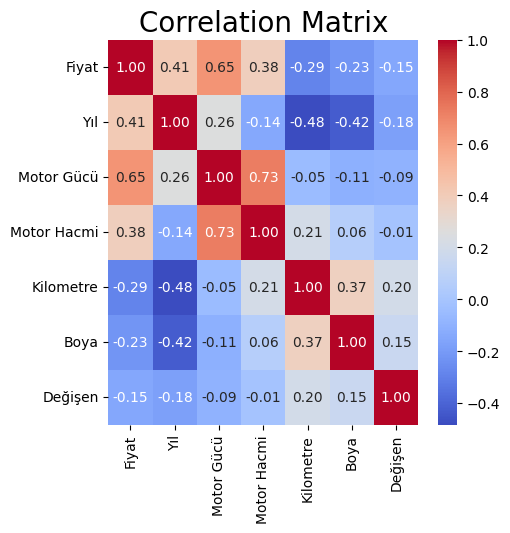

In [72]:
f,ax=plt.subplots(figsize=[5,5])
sns.heatmap(df.corr(), annot=True, fmt=".2f",ax=ax,cmap="coolwarm")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [74]:
df.Marka.nunique()

27

In [76]:
df.Seri.nunique()

330

In [77]:
df.Model.nunique()

2766

In [75]:
df.to_excel("newOutput_2.xlsx")

In [87]:
df["Marka"].unique()

array(['Nissan', 'Honda', 'Renault', 'Opel', 'Hyundai', 'Tofaş', 'Fiat',
       'Ford', 'Dacia', 'Skoda', 'Toyota', 'Mercedes - Benz', 'Audi',
       'Volvo', 'Kia', 'Volkswagen', 'Mitsubishi', 'BMW', 'Lada', 'Mazda',
       'Chevrolet', 'Peugeot', 'Citroen', 'Seat', 'Alfa Romeo', 'Suzuki',
       'MINI'], dtype=object)

In [82]:
for marka in df["Marka"].unique():
    name = marka + ".xlsx"
    df[df["Marka"] == marka].to_excel(name)

In [83]:
df[df["Marka"] == "Audi"]

,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Gücü,Motor Hacmi,Kilometre,Boya,Değişen
74,730000,Audi,A6,A6 Sedan 2.0 TDI,2011,Dizel,Otomatik,170,1968,676000,0,0
111,300000,Audi,A6,A6 Sedan 1.9 TDI,2004,Dizel,Otomatik,130,1896,592000,<NA>,<NA>
152,320000,Audi,A4,A4 Sedan 1.9 TDI,2005,Dizel,Otomatik,130,1896,545000,<NA>,<NA>
163,325000,Audi,A4,A4 Sedan 1.6,2006,Benzin,Düz,102,1595,534000,<NA>,<NA>
183,1475000,Audi,A8,3.0 TDI Quattro Long,2012,Dizel,Otomatik,250,2967,518195,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
37535,1650000,Audi,A3,A3 Sportback 1.5 TFSI,2022,Benzin,Yarı Otomatik,150,1498,6000,0,0
37703,1910000,Audi,A3,A3 Sportback 35 TFSI Sport,2023,Benzin,Otomatik,151,1401,1001,0,0
37704,3000000,Audi,A5,A5 Sportback 40 TDI Quattro S Line,2023,Dizel,Yarı Otomatik,204,1968,1001,<NA>,<NA>
37729,365000,Audi,A6,A6 Sedan 1.8 T,2000,LPG & Benzin,Düz,150,1781,1000,12,0


In [88]:
def one_hot_encoder(dataframe, categorical_col, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns = categorical_col, drop_first=drop_first)
    return dataframe

In [89]:
cat_col_marka = ["Seri","Model","Yakıt Tipi","Vites Tipi"]

In [92]:
for marka in df["Marka"].unique():
    name = marka + ".xlsx"
    df_marka = pd.read_excel("marka_file/"+name, sheet_name="Sheet1")
    df_marka.drop("Marka",axis=1,inplace=True)
    df_marka = one_hot_encoder(df_marka, cat_col_marka, drop_first=True)
    df_marka.to_excel("marka_file/"+name)